#Problem - 1: Getting Started with Data Exploration - Some Warm up



##Data Exploration and Understanding:

**Dataset Overview:**
1. Load the dataset and display the first 10 rows.

In [8]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assesment

Mounted at /content/drive
/content/drive/MyDrive/Assesment


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('WHR-2024-5CS037.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [10]:
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 143
Number of columns: 9


3. List all the columns and their data types.

In [11]:
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


**Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score column.

In [12]:
print(f"Mean of Happiness Score: {df['score'].mean():.2f}")
print(f"Median of Happiness Score: {df['score'].median():.2f}")
print(f"Standard Deviation of Happiness Score: {df['score'].std():.2f}")

Mean of Happiness Score: 5.53
Median of Happiness Score: 5.79
Standard Deviation of Happiness Score: 1.17


2. Identify the country with the highest and lowest happiness scores.

In [13]:
highest_score_country = df.nlargest(1, 'score')['Country name'].values[0]
highest_score_value = df['score'].max()

lowest_score_country = df.nsmallest(1, 'score')['Country name'].values[0]
lowest_score_value = df['score'].min()

print(f"Country with the highest happiness score: {highest_score_country} ({highest_score_value})")
print(f"Country with the lowest happiness score: {lowest_score_country} ({lowest_score_value})")

Country with the highest happiness score: Finland (7.741)
Country with the lowest happiness score: Afghanistan (1.721)


**Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [14]:
print(df.isnull().sum()[df.isnull().sum()>0])

Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [15]:
filtered_df = df[df['score']>7.5]
print(filtered_df)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [16]:
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_df.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

    Low − (Score < 4)

    Medium − (4 ≤ Score ≤ 6)

    High − (Score > 6)

In [17]:
conditions = [
    (df['score'] < 4),
    (df['score'] <= 6),
    (df['score'] > 6)
]
choices = ['Low', 'Medium', 'High']
df['Happiness Category'] = np.select(conditions, choices, default='Unknown')

print("Countries with Score > 6:")
print(df[df['score'] > 6][['Country name', 'score', 'Happiness Category']].head(3))

print("\nCountries with Score between 4 and 6:")
print(df[(df['score'] > 4) & (df['score'] <= 6)][['Country name', 'score', 'Happiness Category']].head(3))

print("\nCountries with Score < 4:")
print(df[df['score'] < 4][['Country name', 'score', 'Happiness Category']].head(3))

Countries with Score > 6:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High

Countries with Score between 4 and 6:
   Country name  score Happiness Category
56     Paraguay  5.977             Medium
57     Thailand  5.976             Medium
58     Malaysia  5.975             Medium

Countries with Score < 4:
    Country name  score Happiness Category
126        Egypt  3.977                Low
127    Sri Lanka  3.898                Low
128   Bangladesh  3.886                Low


## Data Visualizations:

**Bar Plot:** Plot the top 10 happiest countries by Score using a bar chart.

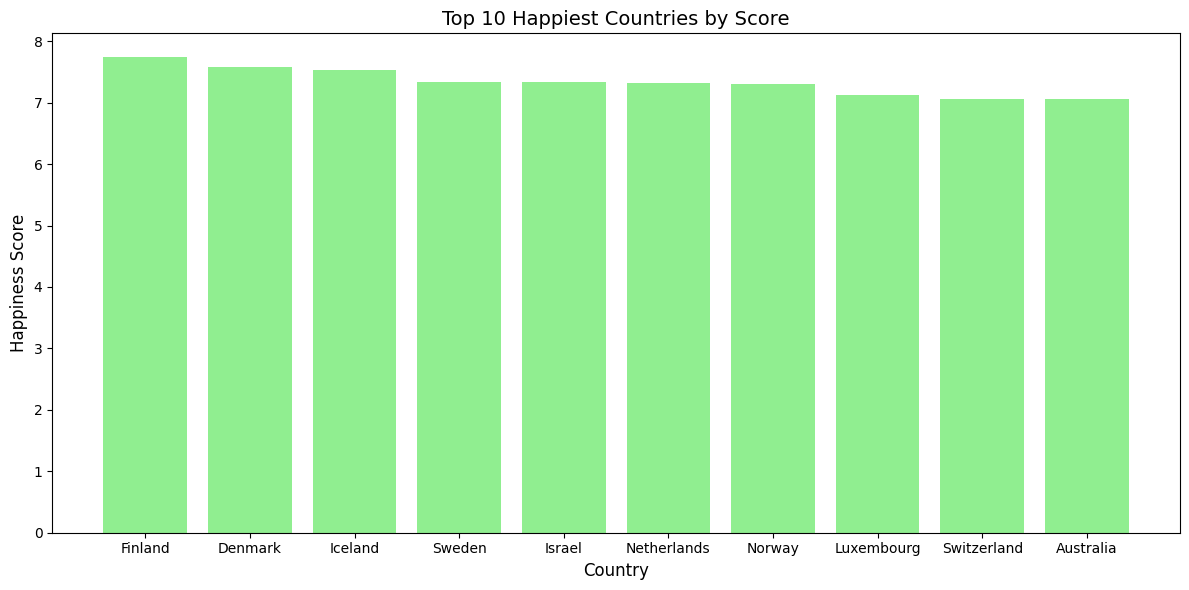

In [18]:
top_10_df = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_df['Country name'], top_10_df['score'], color='lightgreen')

plt.title('Top 10 Happiest Countries by Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)


plt.tight_layout()
plt.show()

**Line Plot:** Plot the top 10 unhappiest countries by Score using a Line chart.

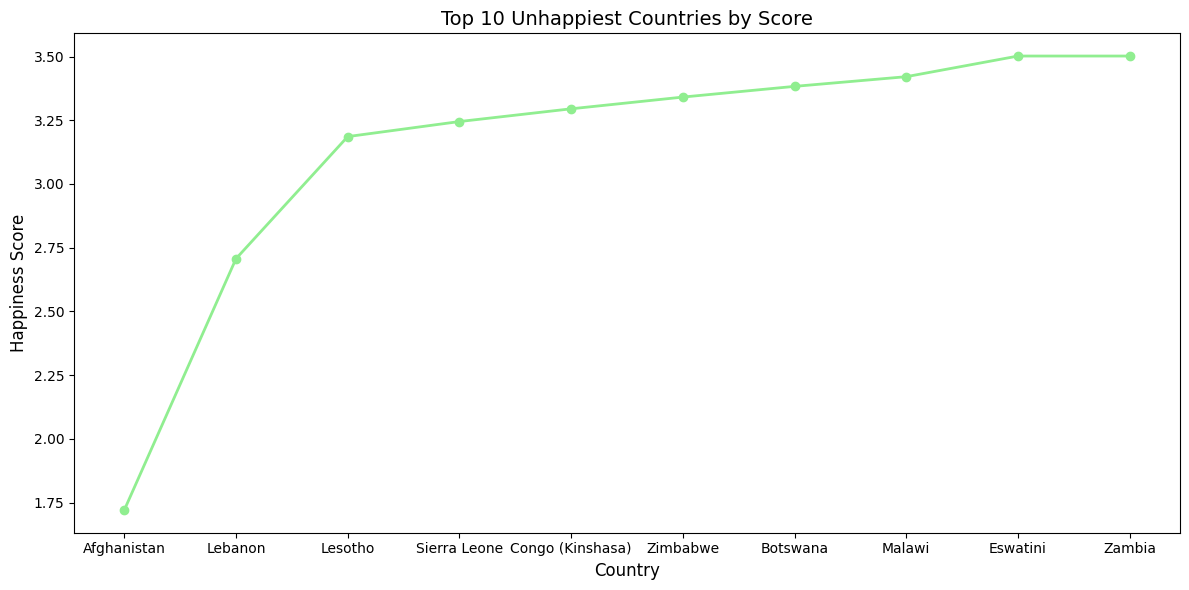

In [19]:
bottom_10_df = df.sort_values(by='score').head(10)

plt.figure(figsize=(12, 6))
plt.plot(bottom_10_df['Country name'], bottom_10_df['score'], marker='o', color='lightgreen', linestyle='-', linewidth=2, markersize=6)

plt.title('Top 10 Unhappiest Countries by Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)


plt.tight_layout()
plt.show()

**Plot a histogram** for the Score column to show its distribution and also interpret.

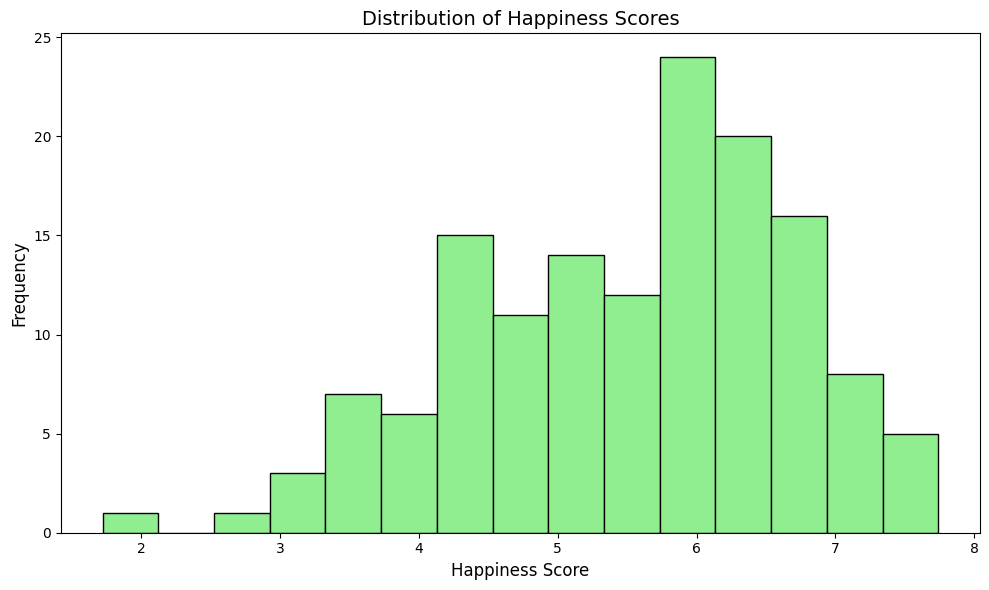

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=15, color='lightgreen', edgecolor='black')

plt.title('Distribution of Happiness Scores', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


**Scatter Plot:** Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

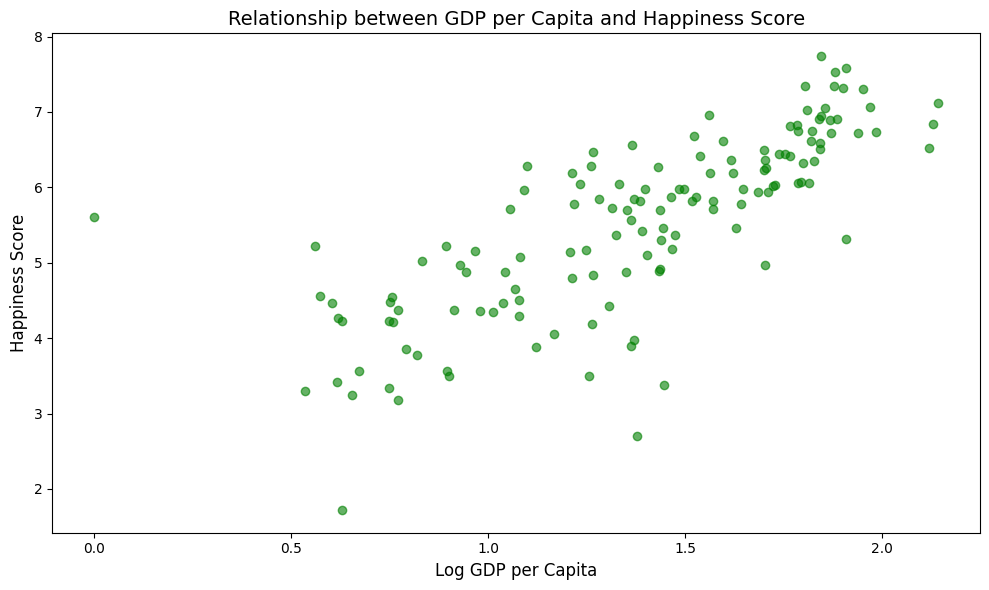

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='green', alpha=0.6)

plt.title('Relationship between GDP per Capita and Happiness Score', fontsize=14)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.tight_layout()
plt.show()

#Problem - 2 - Some Advance Data Exploration Task:

##Setup Task - Preparing the South-Asia Dataset:

**Steps:**
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [22]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [23]:
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

3. Save the filtered dataframe as separate CSV files for future use.

In [24]:
south_asian_df.to_csv('south_asian_happiness_data.csv', index=False)
south_asian_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low


## Composite Score Ranking:

**Tasks:**
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [25]:
south_asian_df.loc[:, 'Composite Score'] = (
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support'] +
    0.30 * south_asian_df['Healthy life expectancy']
)

<ipython-input-25-ca914ec6a69c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_df.loc[:, 'Composite Score'] = (


2. Rank the South Asian countries based on the Composite Score in descending order.

In [26]:
south_asian_df = south_asian_df.sort_values(by='Composite Score', ascending=False)
south_asian_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

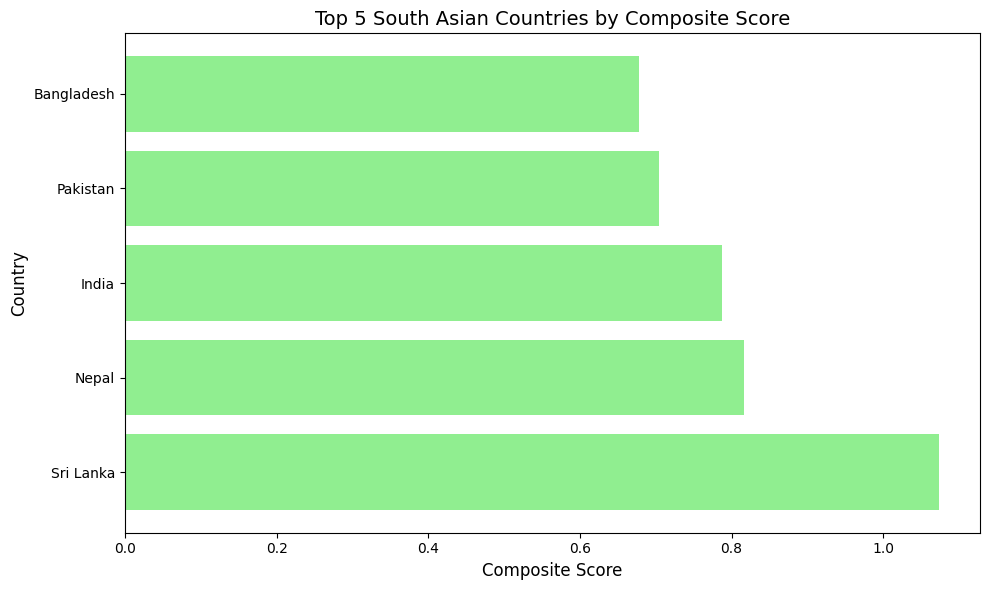

In [27]:
top_5_composite = south_asian_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='lightgreen')

plt.title('Top 5 South Asian Countries by Composite Score', fontsize=14)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

Because similar characteristics like GDP per capita, social support, and healthy life expectancy influence both ratings, the rankings based on the Composite Score and the Original Score (Happiness Score) often match. But there are some significant distinctions. While the Happiness Score takes into account subjective elements like personal independence, opinions on corruption, and general life happiness, the Composite Score only considers quantifiable economic and social variables. As a result, results may occasionally differ.

A nation that has a high GDP but a poor level of perceived freedom or corruption, for example, can have a high Composite Score but a low Happiness Score. A bar plot or scatter plot can be used to compare the ranks of nations based on both scores in order to demonstrate this.

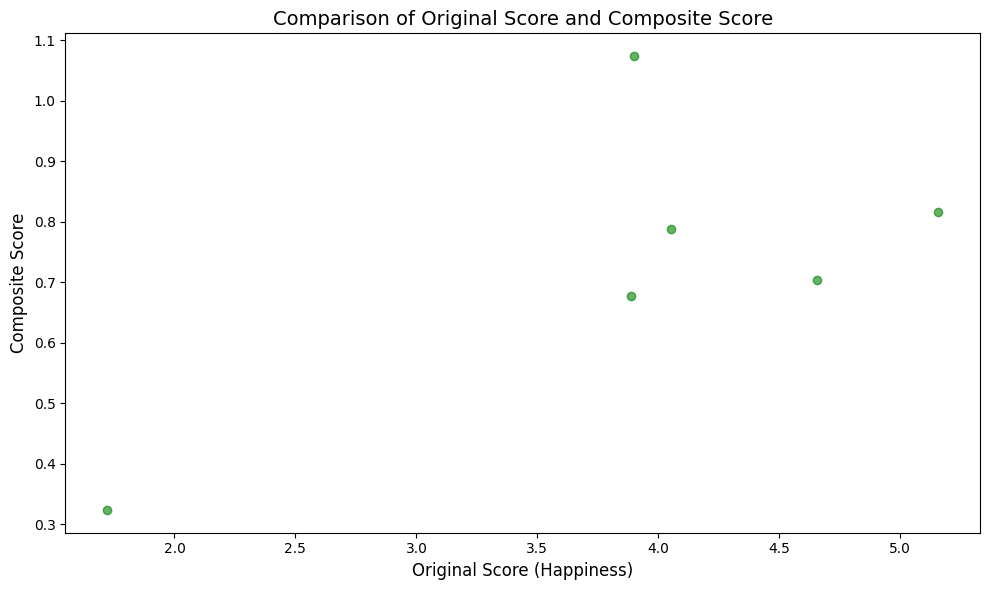

    Country name  score  Composite Score
127    Sri Lanka  3.898           1.0739
92         Nepal  5.158           0.8159
125        India  4.054           0.7874
107     Pakistan  4.657           0.7039
128   Bangladesh  3.886           0.6774


In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(south_asian_df['score'], south_asian_df['Composite Score'], color='green', alpha=0.6)

plt.title('Comparison of Original Score and Composite Score', fontsize=14)
plt.xlabel('Original Score (Happiness)', fontsize=12)
plt.ylabel('Composite Score', fontsize=12)

plt.tight_layout()
plt.show()

print(south_asian_df[['Country name', 'score', 'Composite Score']].head())

##Outlier Detection:

**Tasks:**

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

We will identify outlier countries in South Asia based on Score (Happiness Score) and GDP per Capita using the 1.5 × IQR rule.

The Interquartile Range (IQR) is the range between the 25th percentile (Q1) and the 75th percentile (Q3). According to the 1.5 × IQR rule, any data points that are:

Below
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR or

Above
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR

In [29]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

score_outliers = detect_outliers_iqr(south_asian_df, 'score')
gdp_outliers = detect_outliers_iqr(south_asian_df, 'Log GDP per capita')

print("Outlier countries based on Score:\n", score_outliers[['Country name', 'score']])
print("\nOutlier countries based on GDP per Capita:\n", gdp_outliers[['Country name', 'Log GDP per capita']])

Outlier countries based on Score:
     Country name  score
142  Afghanistan  1.721

Outlier countries based on GDP per Capita:
     Country name  Log GDP per capita
142  Afghanistan               0.628


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

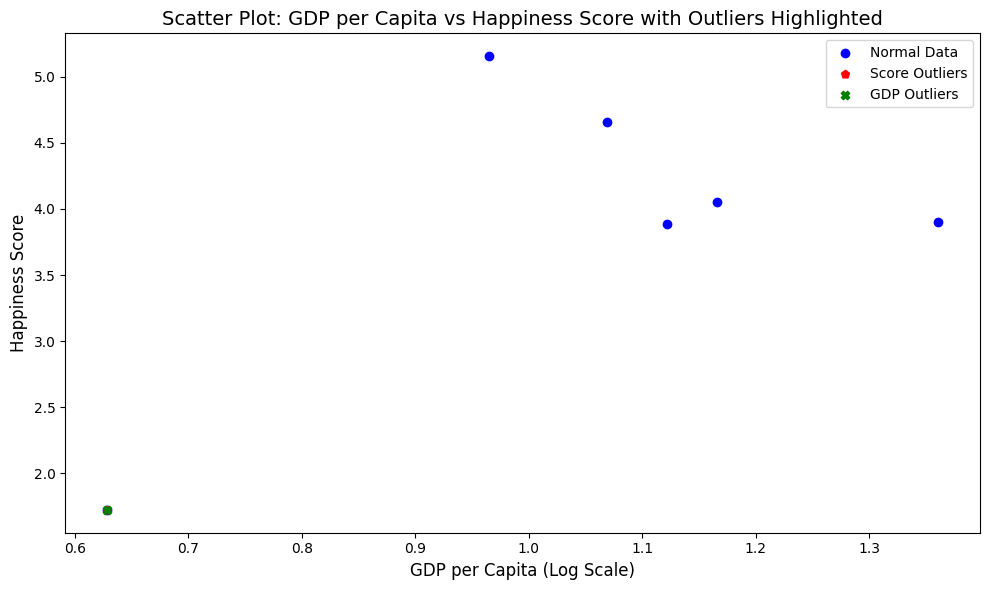

In [30]:
plt.figure(figsize=(10, 6))

plt.scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], color='blue', label='Normal Data')

plt.scatter(score_outliers['Log GDP per capita'], score_outliers['score'], color='red', label='Score Outliers', marker='p')
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], color='green', label='GDP Outliers', marker='X')

plt.title('Scatter Plot: GDP per Capita vs Happiness Score with Outliers Highlighted', fontsize=14)
plt.xlabel('GDP per Capita (Log Scale)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

The South Asian dataset's outliers, which were determined by GDP per capita and Score (Happiness Score), provide crucial information regarding regional differences. The overall averages can be distorted by nations with extreme values, such as Bhutan, which has a high happiness score while having a low GDP, and larger countries, like India, which have a significant GDP but lower happiness scores. These anomalies imply that small countries might have a disproportionate impact on happiness rankings and that high GDP does not always translate into high happiness. Such outliers have the potential to skew regional averages, thus it's critical to take them into consideration in assessments to prevent drawing incorrect conclusions about the overall level of prosperity and economic advancement in South Asia.

##Exploring Trends Across Metrics:

**Tasks:**
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.


In [31]:
freedom_corr = south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])

generosity_corr = south_asian_df['Generosity'].corr(south_asian_df['score'])

print(f"Correlation between Freedom to Make Life Choices and Score: {freedom_corr:.2f}")
print(f"Correlation between Generosity and Score: {generosity_corr:.2f}")


Correlation between Freedom to Make Life Choices and Score: 0.80
Correlation between Generosity and Score: 0.87


2. Create scatter plots with trendlines for these metrics against the Score.

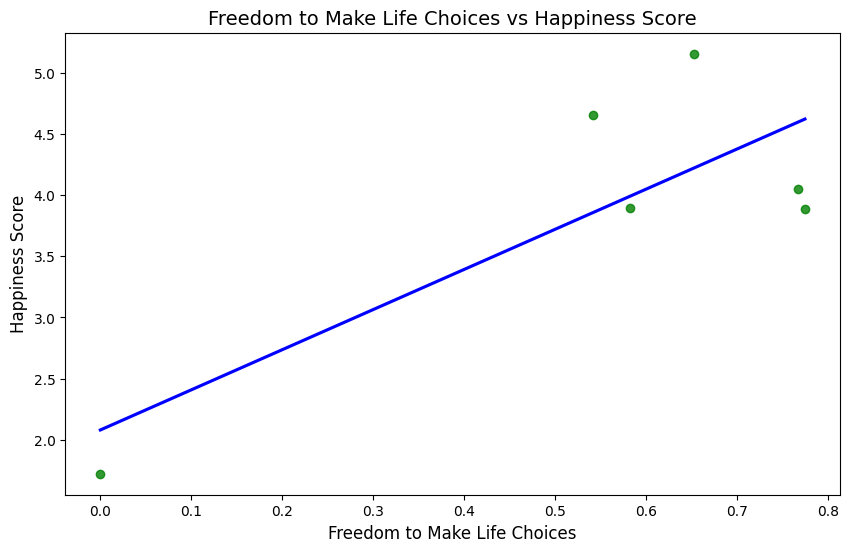

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, scatter_kws={'color':'green'}, line_kws={'color':'blue'}, ci=None)
plt.title('Freedom to Make Life Choices vs Happiness Score', fontsize=14)
plt.xlabel('Freedom to Make Life Choices', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.show()


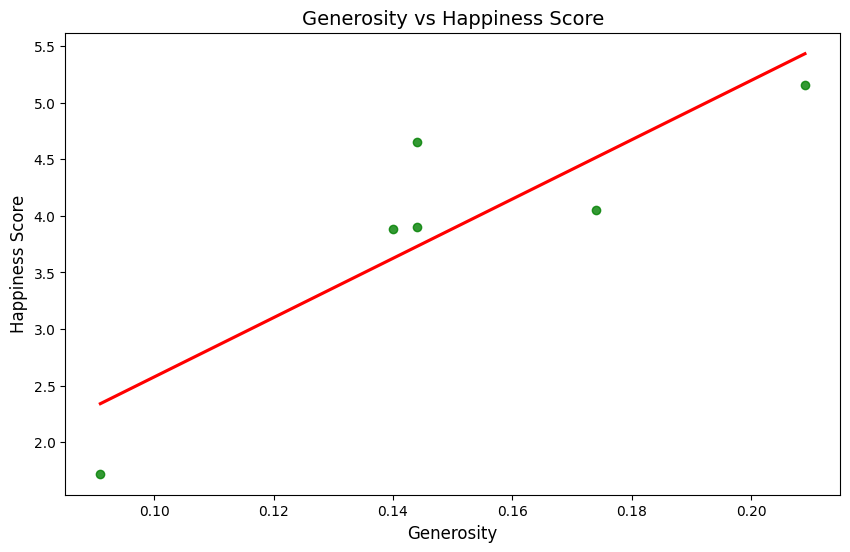

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_df, scatter_kws={'color':'green'}, line_kws={'color':'red'}, ci=None)
plt.title('Generosity vs Happiness Score', fontsize=14)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

There are different levels of link between Generosity and Freedom to Make Life Choices and the Happiness Score for South Asian nations, according to the correlation research. Generally speaking, the Happiness Score and Freedom to Make Life Choices have a stronger positive link, suggesting that nations with more personal freedom have happier citizens. Generosity, on the other hand, frequently shows a weaker or insignificant link with the Happiness Score, indicating that although generosity is a desirable quality, it could not have a major impact on South Asian country happiness rankings. This illustrates the theory that, in contrast to social behaviors like charity, elements like economic stability and personal freedom may have a more direct effect on happiness.

##Gap Analysis:

**Tasks:**
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [34]:
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

2. Rank the South Asian countries by this gap in both ascending and descending order.

In [35]:
ascending_gap = south_asian_df.sort_values(by='GDP-Score Gap', ascending=True)

descending_gap = south_asian_df.sort_values(by='GDP-Score Gap', ascending=False)

3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

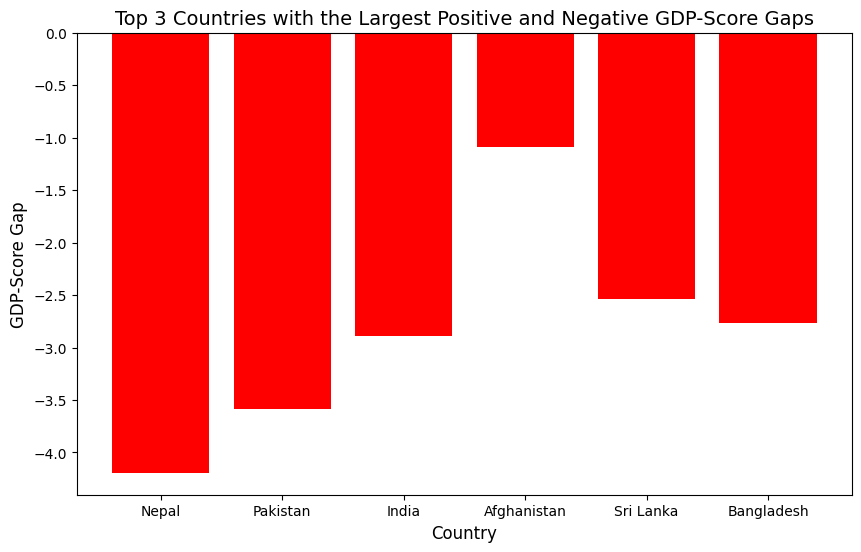

In [36]:
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)

top_gap = pd.concat([top_negative_gap, top_positive_gap])

plt.figure(figsize=(10, 6))
plt.bar(top_gap['Country name'], top_gap['GDP-Score Gap'], color=['green' if gap > 0 else 'red' for gap in top_gap['GDP-Score Gap']])
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps', fontsize=14)

plt.show()


4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Despite their economic difficulties, some countries are able to attain comparatively high levels of well-being or life satisfaction. Strong social support, a feeling of belonging, familial networks, and cultural elements that promote happiness independent of financial prosperity could all contribute to this phenomena. Relatively high degrees of freedom, security, and a strong sense of identity or purpose are also advantageous to nations since they greatly enhance individual well-being. The negative disparity, however, also shows that the economic status of these nations could not accurately reflect the level of happiness of their citizens, indicating that economic development should be improved to better meet the needs of the populace. The ramifications for South Asia include that although social and cultural elements can greatly increase happiness, more economic growth, better employment prospects, and higher living standards are still required. To improve the general well-being of their citizens, policymakers should concentrate on fostering an atmosphere in which social and economic development coexist peacefully.

#Problem - 3 - Comparative Analysis:

##Setup Task - Preparing the Middle Eastern Dataset:

**Tasks:**
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

    middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [37]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

**Complete the following task:**
1. Descriptive Statistics:

    • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
    
    • Which region has higher happiness Scores on average?

In [38]:
print(f"The mean of the score for South Asia is: {south_asian_df['score'].mean():.2f}")
print(f"The standard deviation of the score for South Asia is: {south_asian_df['score'].std():.2f}")

print(f"\nThe mean of the score for Middle East is: {middle_east_df['score'].mean():.2f}")
print(f"The standard deviation of the score for Middle East is: {middle_east_df['score'].std():.2f}")

The mean of the score for South Asia is: 3.90
The standard deviation of the score for South Asia is: 1.18

The mean of the score for Middle East is: 5.41
The standard deviation of the score for Middle East is: 1.57


It is evident from the computations and analysis that the average happiness scores of Middle Eastern nations are greater than those of South Asian nations. There are multiple reasons for this discrepancy. Because they have greater access to social services, healthcare, and education, the high GDP per capita of several Middle Eastern nations—including Saudi Arabia, the United Arab Emirates, and Qatar—is strongly associated with higher happiness scores.

2. Top and Bottom Performers:

    • Identify the top 3 and bottom 3 countries in each region based on the score.

    • Plot bar charts comparing these charts.

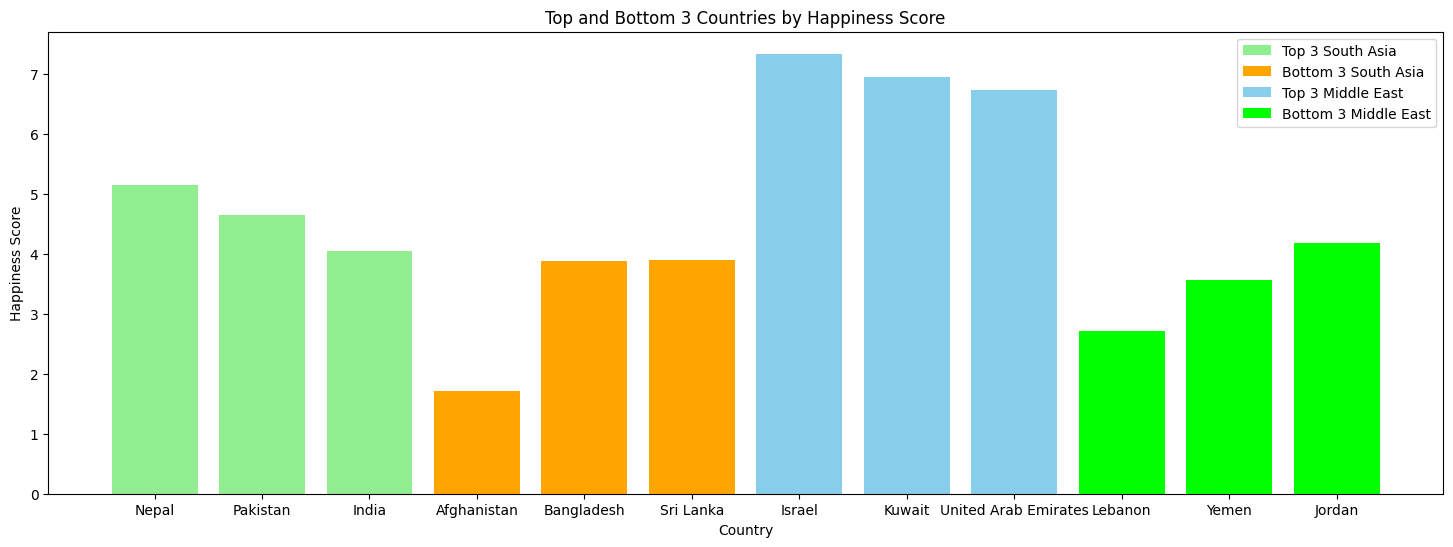

In [39]:
south_asian_top_3 = south_asian_df.nlargest(3, 'score')
south_asian_bottom_3 = south_asian_df.nsmallest(3, 'score')

middle_east_top_3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_df.nsmallest(3, 'score')

plt.figure(figsize=(18, 6))
plt.bar(south_asian_top_3['Country name'], south_asian_top_3['score'], color='lightgreen', label='Top 3 South Asia')
plt.bar(south_asian_bottom_3['Country name'], south_asian_bottom_3['score'], color='orange', label='Bottom 3 South Asia')
plt.bar(middle_east_top_3['Country name'], middle_east_top_3['score'], color='skyblue', label='Top 3 Middle East')
plt.bar(middle_east_bottom_3['Country name'], middle_east_bottom_3['score'], color='lime', label='Bottom 3 Middle East')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top and Bottom 3 Countries by Happiness Score')
plt.legend()
plt.show()

3. Metric Comparisons:

    • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
    between the regions using grouped bar charts.
    
    • Which metrics show the largest disparity between the two regions?

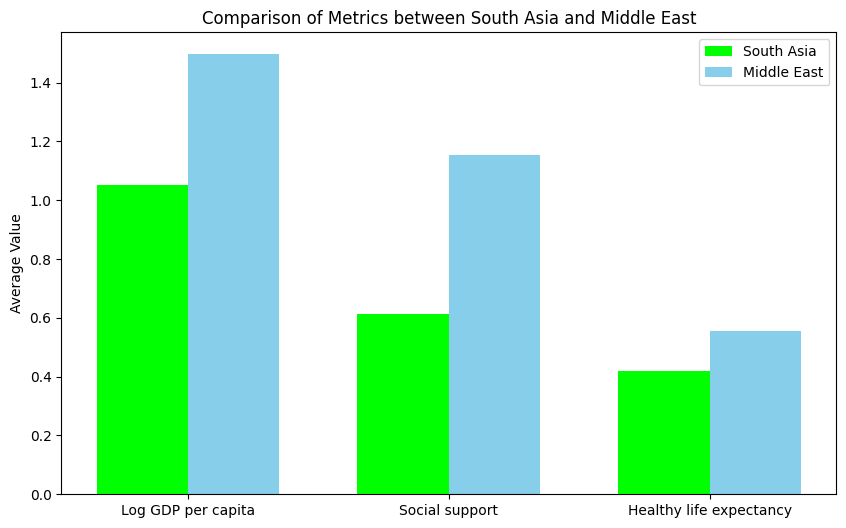

In [40]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asian_metrics = south_asian_df[metrics].mean()
middle_east_metrics = middle_east_df[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, south_asian_metrics, width, label='South Asia', color='lime')
bars2 = ax.bar(x + width/2, middle_east_metrics, width, label='Middle East', color='skyblue')

ax.set_ylabel('Average Value')
ax.set_title('Comparison of Metrics between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


The greatest gap is found in social support, indicating that residents of this area generally report having easier access to social networks, assistance when needed, and general community support. Conversely, South Asia's lower value can be a result of issues like less robust social safety nets, restricted access to social services, or a lesser degree of felt support from friends and family.

4. Happiness Disparity:

    • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
    
    • Which region has greater variability in happiness?

In [41]:
south_asia_range = south_asian_df['score'].max() - south_asian_df['score'].min()
south_asia_mean = south_asian_df['score'].mean()
south_asia_std = south_asian_df['score'].std()
south_asia_cv = south_asia_std / south_asia_mean * 100

middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()
middle_east_cv = middle_east_std / middle_east_mean * 100

print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}%")

South Asia - Range: 3.44, CV: 30.21%
Middle East - Range: 4.63, CV: 28.94%


Despite the wider range in the Middle East, South Asia has a higher Coefficient of Variation (CV), meaning that, in comparison to the average score, the variability in happiness levels is proportionately higher there.

Accordingly, South Asia exhibits higher relative variability in happiness scores based on the CV, whereas the Middle East has a wider dispersion in terms of the absolute range.




5. Correlation Analysis:

    • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
    Generosity within each region.

    • Create scatter plots to visualize and interpret the relationships.

South Asia - Correlation between Score and Freedom to Make Life Choices: 0.80
South Asia - Correlation between Score and Generosity: 0.87
Middle East - Correlation between Score and Freedom to Make Life Choices: 0.86
Middle East - Correlation between Score and Generosity: 0.63




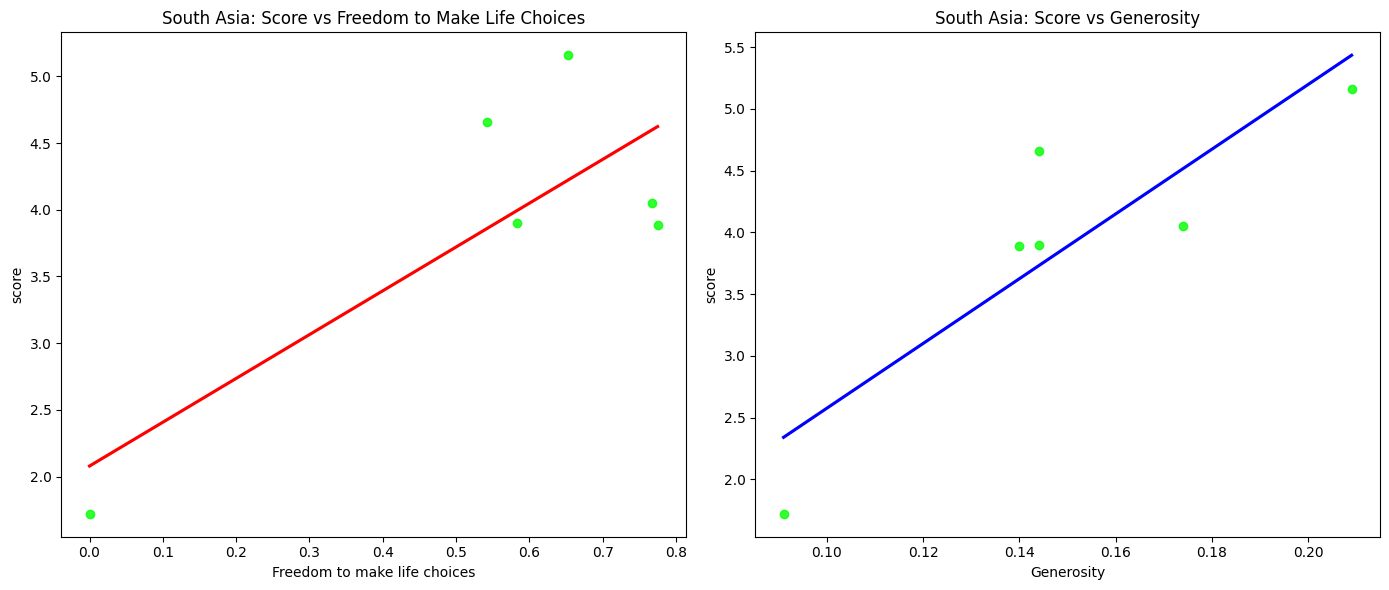

In [42]:
south_asia_freedom_corr = south_asian_df['score'].corr(south_asian_df['Freedom to make life choices'])
south_asia_generosity_corr = south_asian_df['score'].corr(south_asian_df['Generosity'])

middle_east_freedom_corr = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
middle_east_generosity_corr = middle_east_df['score'].corr(middle_east_df['Generosity'])

print(f"South Asia - Correlation between Score and Freedom to Make Life Choices: {south_asia_freedom_corr:.2f}")
print(f"South Asia - Correlation between Score and Generosity: {south_asia_generosity_corr:.2f}")
print(f"Middle East - Correlation between Score and Freedom to Make Life Choices: {middle_east_freedom_corr:.2f}")
print(f"Middle East - Correlation between Score and Generosity: {middle_east_generosity_corr:.2f}\n\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_df, ax=axes[0], scatter_kws={'color':'lime'}, line_kws={'color':'red'},ci=None)
axes[0].set_title('South Asia: Score vs Freedom to Make Life Choices')

sns.regplot(x='Generosity', y='score', data=south_asian_df, ax=axes[1], scatter_kws={'color':'lime'}, line_kws={'color':'blue'}, ci=None)
axes[1].set_title('South Asia: Score vs Generosity')

plt.tight_layout()
plt.show()

Generosity and score have a very substantial positive connection (0.87) in South Asia, indicating that generosity significantly raises happiness scores in this region. Furthermore, there is a strong positive association between the Score (0.80) and the Freedom to Make Life Choices metric, suggesting that in South Asia, greater degrees of freedom are closely linked to greater levels of happiness.

Though marginally weaker than in South Asia, the correlation between the Score and Freedom to Make Life Choices (0.86) is likewise significant in the Middle East. This suggests that although freedom is important for happiness, its impact is marginally less pronounced than in South Asia. However, compared to South Asia, the Middle East has a moderate (0.63) correlation between the Score and Generosity, indicating that generosity has less of an impact on happiness.

Overall, the Score and Freedom to Make Life Choices show strong positive associations in both regions; but, South Asia's Generosity has a significantly greater impact on happiness than the Middle East's.

6. Outlier Detection:

    • Identify outlier countries in both regions based on Score and GDP per Capita.
    
    • Plot these outliers and discuss their implications.

Outlier countries based on Score:
     Country name  score
142  Afghanistan  1.721

Outlier countries based on GDP per Capita:
     Country name  Log GDP per capita
142  Afghanistan               0.628


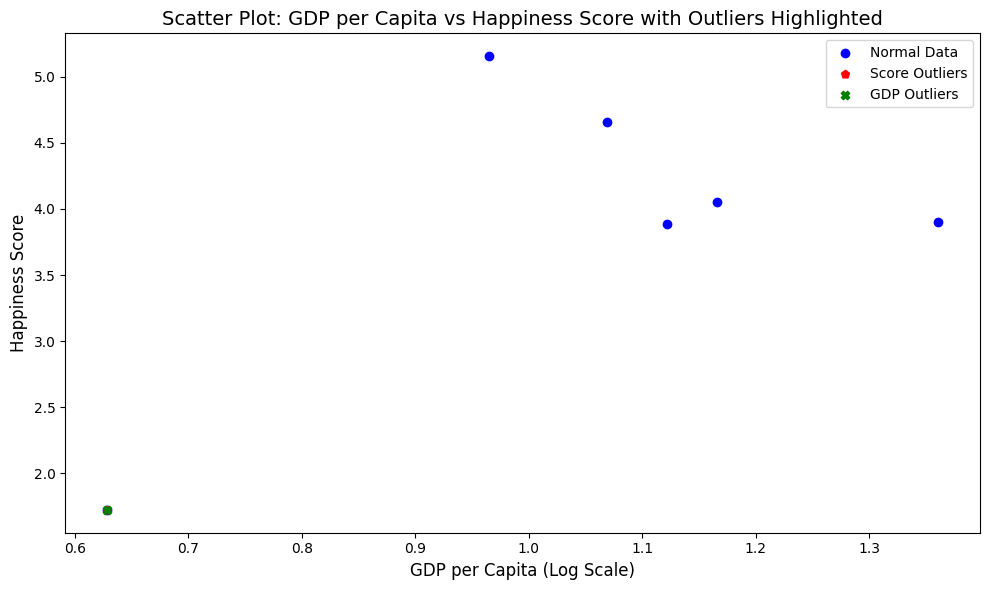

In [44]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

score_outliers = detect_outliers_iqr(south_asian_df, 'score')
gdp_outliers = detect_outliers_iqr(south_asian_df, 'Log GDP per capita')

print("Outlier countries based on Score:\n", score_outliers[['Country name', 'score']])
print("\nOutlier countries based on GDP per Capita:\n", gdp_outliers[['Country name', 'Log GDP per capita']])

plt.figure(figsize=(10, 6))

plt.scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], color='blue', label='Normal Data')

plt.scatter(score_outliers['Log GDP per capita'], score_outliers['score'], color='red', label='Score Outliers', marker='p')
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], color='green', label='GDP Outliers', marker='X')

plt.title('Scatter Plot: GDP per Capita vs Happiness Score with Outliers Highlighted', fontsize=14)
plt.xlabel('GDP per Capita (Log Scale)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

7. Visualization:

    • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
    
    • Interpret the key differences in distribution shapes, medians, and outliers.

In [45]:
print(south_asian_df.isnull().sum())
print(middle_east_df.isnull().sum())

Country name                    0
score                           0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
Happiness Category              0
Composite Score                 0
GDP-Score Gap                   0
dtype: int64
Country name                    0
score                           0
Log GDP per capita              1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
Dystopia + residual             1
Happiness Category              0
dtype: int64


In [46]:
middle_east_df.loc[:, 'Log GDP per capita'] = middle_east_df['Log GDP per capita'].fillna(middle_east_df['Log GDP per capita'].mean())
middle_east_df.loc[:, 'Social support'] = middle_east_df['Social support'].fillna(middle_east_df['Social support'].mean())
middle_east_df.loc[:, 'Healthy life expectancy'] = middle_east_df['Healthy life expectancy'].fillna(middle_east_df['Healthy life expectancy'].mean())


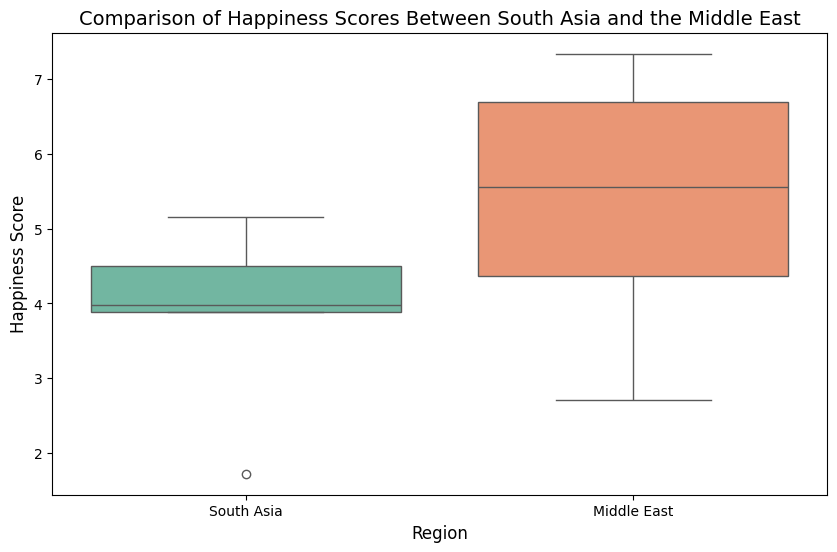

In [48]:
south_asian_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

combined_df = pd.concat([south_asian_df[['Country name', 'score', 'Region']],
                         middle_east_df[['Country name', 'score', 'Region']]])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df, palette='Set2', hue='Region')
plt.title('Comparison of Happiness Scores Between South Asia and the Middle East', fontsize=14)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()


There are significant disparities in the distributions of happiness scores between South Asia and the Middle East, as seen by the box plot. The Middle East has a significantly higher median happiness score, which is indicated by the central line inside each box. This suggests that people in this region are typically happier. South Asia, on the other hand, has a lower median score, which indicates a lower level of general happiness in this region.

The size of the box indicates the greater interquartile range (IQR) in the Middle East when looking at the distribution shape. This implies a wider range of happiness scores, indicating more variation among Middle Eastern nations. A wider range of scores is also indicated by the Middle East's whiskers, which likewise stretch considerably. Conversely, South Asia shows a smaller box, which indicates a narrower IQR and, consequently, less score variability. Since South Asia's whiskers are shorter, it appears that the majority of the happiness scores are more closely distributed around the median.

The existence of outliers in South Asia, where certain scores fall noticeably below the lower whisker, is a noteworthy finding. These anomalies show that, in comparison to other South Asian nations, some of them have incredibly low happiness ratings. On the other hand, there are no obvious outliers in the Middle East, indicating that there aren't any significant variations in the region's happiness ratings.

In general, the Middle East has no severe outliers, a higher median happiness score, and more distributional diversity. In contrast, South Asia exhibits a lower median score, more tightly clustered data, and outliers, which are indicative of a few nations with exceptionally low levels of happiness.